# Explore here

Imports

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import *
from imblearn.metrics import specificity_score
import xgboost as xgb
from pickle import dump

Load the data

In [183]:
all_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
all_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check for any null values

In [184]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Check for unique values and duplicates

In [185]:
n_unique = all_data.nunique()
print(n_unique)
all_data.duplicated().sum()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


np.int64(0)

We observe at plain view that some values are 0 when that's not possible in real life, using describe we are going to check the.

In [186]:
all_data.describe(include= "all").T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Columns that have a 0 value that aren't possible are "Glocuse", "BloodPressure", "SkinThickness", "Insulin", "BMI"

We need to treat that data.

In [187]:
#This are the columns with data being 0
zero_data = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

#Change the 0 values to nan to the use the method fillna
all_data[zero_data] = all_data[zero_data].replace(0, np.nan)

#Replace those NaN values with the median
all_data[zero_data] = all_data[zero_data].fillna(all_data[zero_data].median())


Now that data is treated we need to separate into train and test

In [188]:
X = all_data.drop(["Outcome"], axis= 1) #Independant variables
y = all_data["Outcome"] #Dependant variable, target

#Separate into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Use XGBoost to select the best features for the model

In [189]:
#Create the model and fit it
xgb_model = xgb.XGBClassifier(random_state=42).fit(X_train, y_train)

#Create a new dataframe to display the importance
df_imp = pd.DataFrame({'Feature':X_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

,Feature,Importance
1,Glucose,23.867460
7,Age,13.735546
4,Insulin,13.368461
5,BMI,12.954452
3,SkinThickness,10.694670
6,DiabetesPedigreeFunction,8.534500
2,BloodPressure,8.492273
0,Pregnancies,8.352634


We will keep all the features based on a 1% threshold.

Save the processed data

In [190]:
X_train["Outcome"] = y_train.values
X_test["Outcome"] = y_test.values
X_train.to_csv("../data/processed/clean_train.csv", index = False)
X_test.to_csv("../data/processed/clean_test.csv", index = False)

Now check the relationship between variables using parallel coordinates graph

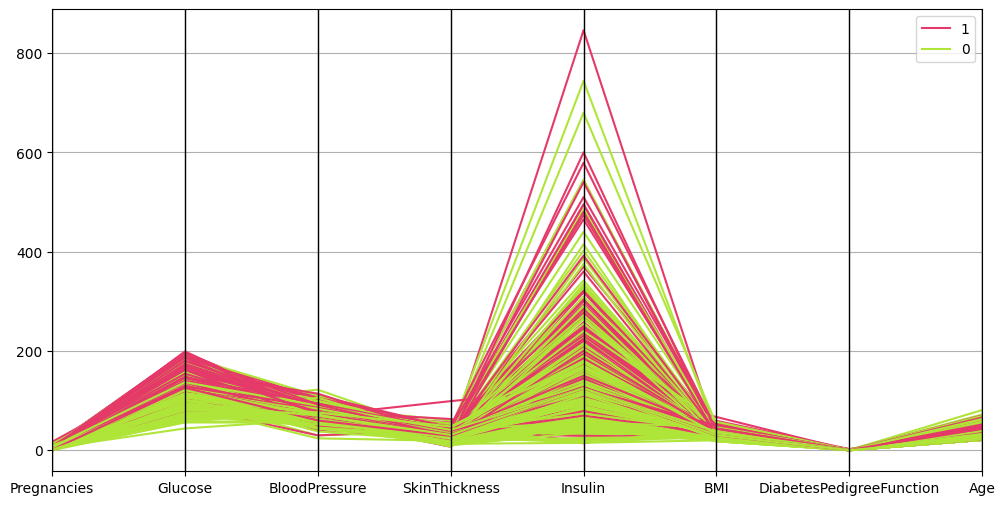

In [191]:
#Create the plot
plt.figure(figsize=(12, 6))

#Plot the parallel coordinates graph
pd.plotting.parallel_coordinates(all_data, "Outcome", color = ("#e5396a", "#afe539", "#e59239"))

plt.show()

Now we continue with the decission tree algorithm, read the data previously saved and divide it.

In [192]:
#Read the data saved
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

#Divide into train and test for each independant and dependant variables
X_train = train_data.drop(["Outcome"], axis = 1) #Independant 
y_train = train_data["Outcome"] #Dependant

X_test = test_data.drop(["Outcome"], axis = 1) #Independant 
y_test = test_data["Outcome"] #Dependant

Create a decission tree classifier

In [193]:
#Create the model
model = DecisionTreeClassifier(random_state= 42)

#Train the model with the train data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Now that the model is created we plot a tree based on the model trained previously

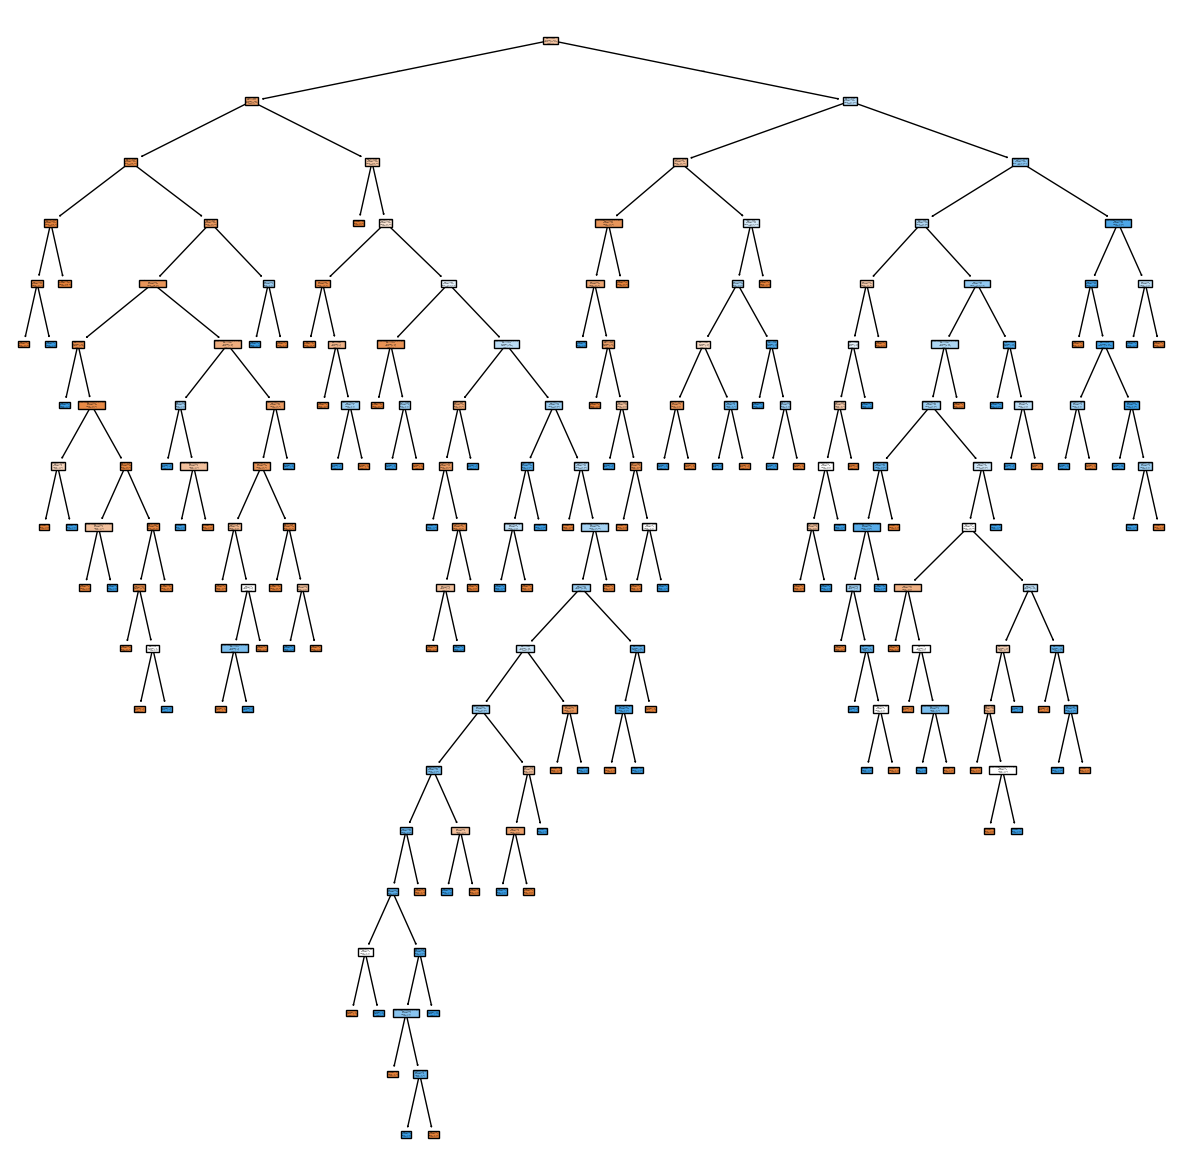

In [194]:
#Create the figure to plot
fig = plt.figure(figsize=(15,15))

#Create the tree plot based on the model trained with the feature names based on the X_train columns
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

#Show the tree
plt.show()

Create a function to get the metrics based on results on train and test

In [195]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    # Metrics for training
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)

    # Metrics for test
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)

    # Differences bewtween test and train
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity

    # Creates a dataframe with the results
    metrics_df = pd.DataFrame([[train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],[test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],[diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]],
                              columns = ['Accuracy', 'F1', 'AUC', 'Precision', 'Recall', 'Specificity'],
                              index = ['Train','Test', 'Differs'])

    return metrics_df

Predict with train and test and get the metrics

In [196]:
#Predict with train
y_pred_train = model.predict(X_train)

#Predict with test
y_pred_test = model.predict(X_test)

#Get the metrics
get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
Test,0.720779,0.619469,0.70202,0.603448,0.636364,0.767677
Differs,0.279221,0.380531,0.29798,0.396552,0.363636,0.232323


Now optimize the model using hyperparameters got by GridSearchCV

In [197]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 15, 20],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 6]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)

#Fit the grid with the train data
grid.fit(X_train, y_train)

print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


Now using the best hyperparameters, retrain the model using them and getting the metrics

In [198]:
#Create the model, this time with hyperparameters
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)

#Fit the model with train data
model.fit(X_train, y_train)

#Predict with train
y_pred_train = model.predict(X_train)

#Predict with test
y_pred_test = model.predict(X_test)

#Get the metrics
get_metrics(y_train, y_test, y_pred_train, y_pred_test)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.814332,0.765432,0.828141,0.681319,0.873239,0.783042
Test,0.714286,0.666667,0.733333,0.571429,0.800000,0.666667
Differs,0.100047,0.098765,0.094808,0.109890,0.073239,0.116376


Now the model recall is much higher, so more cases of diabetes can be predicted. Also, after using the hyperparameters, train metrics were so high due to overfitting.

We improved the model.

Saving the model using pickle

In [199]:
dump(model, open("../models/tree_classifier_crit-entropy_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))